<a href="https://colab.research.google.com/github/NagaSaiRam89/21_daysML/blob/main/Day_7/Day_7_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plot style
sns.set_style('whitegrid')

In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.26 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
# Load the dataset from the user-provided file
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Dataset loaded successfully.
Data shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(f"Shape before cleaning: {df.shape}")

# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Shape after converting TotalCharges to numeric: {df.shape}")


# Find how many rows have missing TotalCharges
print(f"Number of missing TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Impute the missing values with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(f"Shape after imputing TotalCharges: {df.shape}")


# Convert target variable 'Churn' to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(f"Shape after converting Churn to binary: {df.shape}")


# Drop rows with missing Churn values
df.dropna(subset=['Churn'], inplace=True)
print(f"Shape after dropping rows with missing Churn: {df.shape}")


# Drop customerID as it's not a predictive feature
# df.drop('customerID', axis=1, inplace=True) # This line is commented out as customerID is already dropped

print("\nData cleaning complete.")

Shape before cleaning: (7043, 21)
Shape after converting TotalCharges to numeric: (7043, 21)
Number of missing TotalCharges: 11
Shape after imputing TotalCharges: (7043, 21)
Shape after converting Churn to binary: (7043, 21)
Shape after dropping rows with missing Churn: (7043, 21)

Data cleaning complete.


In [ ]:
pd.set_option('display.max_columns', None)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
X_base = df.drop('Churn', axis=1);
y_base = df['Churn'];


numerical_features_base = X_base.select_dtypes(include=np.number).columns.tolist()
categorical_features_base = X_base.select_dtypes(include=['object']).columns.tolist()

preprocessor_base = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_base),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_base)])

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42, stratify=y_base)

baseline_model = Pipeline(steps=[('preprocessor', preprocessor_base),
                                 ('classifier', LogisticRegression(random_state=42, max_iter=1000))])


baseline_model.fit(X_train_base, y_train_base)
y_pred_base = baseline_model.predict(X_test_base)

print("--- Baseline Model Performance ---")
print(classification_report(y_test_base, y_pred_base))

--- Baseline Model Performance ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


/tmp/ipython-input-2862531227.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(); plt.title('Tenure by Churn'); plt.show()


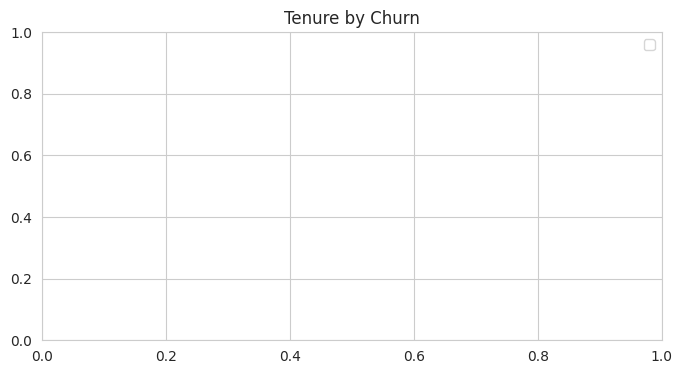

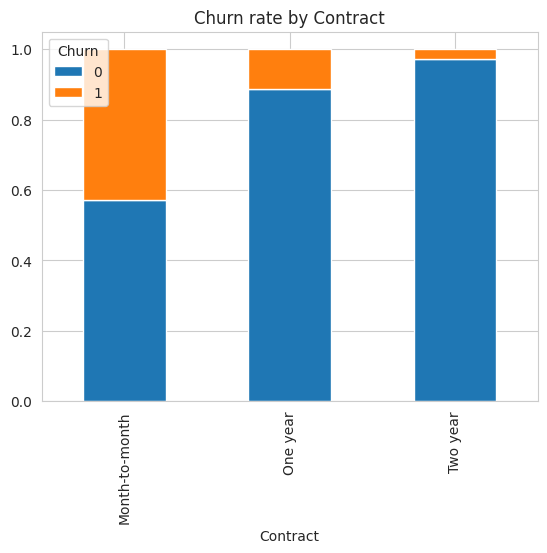

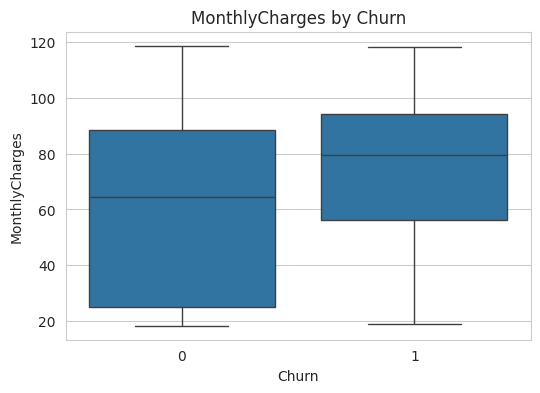

In [ ]:
print(df['Churn'].value_counts(normalize=True))

# tenure distribution by churn
plt.figure(figsize=(8,4))
sns.kdeplot(df.loc[df['Churn']=='No','tenure'], label='No')
sns.kdeplot(df.loc[df['Churn']=='Yes','tenure'], label='Yes')
plt.legend(); plt.title('Tenure by Churn'); plt.show()

# categorical relationship example: Contract vs Churn
ct = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
ct.plot(kind='bar', stacked=True); plt.title('Churn rate by Contract'); plt.show()

# MonthlyCharges box by churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges by Churn'); plt.show()

In [ ]:
df2 = df.copy()

# convert binary categorical to 0/1
binary_cols = ['Partner','Dependents','PaperlessBilling','PhoneService']
for c in binary_cols:
    df2[c] = df2[c].map({'Yes':1, 'No':0})

# Replace 'No internet service' and 'No phone service' with 'No' for service features
service_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                'StreamingTV','StreamingMovies','MultipleLines']
for c in service_cols:
    df2[c] = df2[c].replace({'No internet service':'No', 'No phone service':'No'})

# Create num_services: count of 'Yes' among add-on services
add_on = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
df2['num_services'] = df2[add_on].apply(lambda row: sum(row=='Yes'), axis=1)

# tenure bins
df2['tenure_bin'] = pd.cut(df2['tenure'], bins=[-1,1,12,24,48,100], labels=['<1','1-12','12-24','24-48','48+'])

# avg charge per month as ratio (TotalCharges / tenure; safe divide)
df2['avg_charge'] = df2['TotalCharges'] / df2['tenure'].replace(0,1)

# high monthly flag
df2['high_monthly'] = (df2['MonthlyCharges'] > df2['MonthlyCharges'].median()).astype(int)

# Example interaction: month-to-month & high monthly
df2['mtm_high'] = ((df2['Contract']=='Month-to-month') & (df2['high_monthly']==1)).astype(int)

df2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,num_services,tenure_bin,avg_charge,high_monthly,mtm_high
0,7590-VHVEG,Female,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1,<1,29.850000,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,2,24-48,55.573529,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,2,1-12,54.075000,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,3,24-48,40.905556,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,1-12,75.825000,1,1


In [ ]:
df2['num_services'].value_counts()

,count
num_services,
0,1667
1,1158
3,978
2,957
4,933
5,722
6,420
7,208


In [ ]:
from sklearn.model_selection import train_test_split

# Target encode: 0/1
# df2['ChurnFlag'] = df2['Churn'].map({'Yes':1, 'No':0})

# Choose features — start with meaningful ones
features = ['tenure','MonthlyCharges','TotalCharges','avg_charge','num_services','high_monthly','mtm_high',
            'Contract','PaymentMethod','InternetService','tenure_bin','PaperlessBilling']
X = df2[features]
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_features = ['tenure','MonthlyCharges','TotalCharges','avg_charge','num_services']
cat_features = ['Contract','PaymentMethod','InternetService','tenure_bin']

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('ohe', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

pipe = Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.50      0.81      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.73      0.75      1409

[[728 307]
 [ 72 302]]


In [ ]:
# Fit RF on preprocessed training data to get feature importances
X_train_proc = preprocessor.fit_transform(X_train)
feature_names_num = num_features
ohe = preprocessor.named_transformers_['cat'].named_steps['ohe']
cat_feature_names = list(ohe.get_feature_names_out(cat_features))
all_feature_names = feature_names_num + cat_feature_names

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train_proc, y_train)

importances = pd.Series(rf.feature_importances_, index=all_feature_names).sort_values(ascending=False)
print(importances.head(20))


TotalCharges                               0.169175
MonthlyCharges                             0.165511
avg_charge                                 0.164435
tenure                                     0.133499
Contract_Month-to-month                    0.102033
InternetService_Fiber optic                0.041861
num_services                               0.040782
Contract_Two year                          0.038956
PaymentMethod_Electronic check             0.029555
tenure_bin_48+                             0.016430
InternetService_No                         0.016307
Contract_One year                          0.014548
PaymentMethod_Bank transfer (automatic)    0.011039
InternetService_DSL                        0.010805
PaymentMethod_Credit card (automatic)      0.009855
PaymentMethod_Mailed check                 0.009704
tenure_bin_<1                              0.009040
tenure_bin_24-48                           0.006389
tenure_bin_1-12                            0.005666
tenure_bin_1

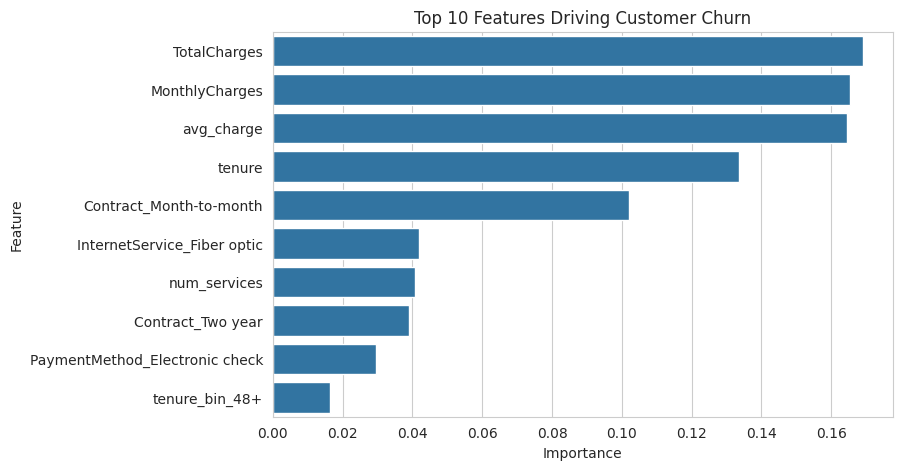

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_feats = importances.head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_feats.values, y=top_feats.index)
plt.title('Top 10 Features Driving Customer Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# === EXTRA FEATURE ENGINEERING ===
def extra_features(df):
    df = df.copy()
    # safe average monthly spend (avoid div by zero)
    df['avg_charge'] = df['TotalCharges'] / df['tenure'].replace(0,1)

    # services engagement: count number of 'Yes' across add-on services
    svc_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
    # normalize values to 'Yes'/'No' first if necessary (replace 'No internet service' -> 'No', etc.)
    for c in svc_cols:
        df[c] = df[c].replace({'No internet service':'No', 'No phone service':'No'})
    df['num_services'] = df[svc_cols].apply(lambda r: sum(r=='Yes'), axis=1)

    # price-per-service (use +1 to avoid division by zero)
    df['price_per_service'] = df['MonthlyCharges'] / (df['num_services'] + 1)

    # tenure buckets (different bins)
    df['tenure_0_6'] = (df['tenure'] <= 6).astype(int)
    df['tenure_6_12'] = ((df['tenure'] > 6) & (df['tenure'] <= 12)).astype(int)
    df['tenure_12_24'] = ((df['tenure'] > 12) & (df['tenure'] <= 24)).astype(int)

    # interactions
    df['mtm_and_high_monthly'] = ((df['Contract']=='Month-to-month') & (df['MonthlyCharges'] > df['MonthlyCharges'].median()) ).astype(int)
    df['fiber_and_high_monthly'] = ((df['InternetService']=='Fiber optic') & (df['MonthlyCharges'] > df['MonthlyCharges'].median())).astype(int)

    # payment behavior flags
    df['is_electronic_check'] = (df['PaymentMethod']=='Electronic check').astype(int)
    df['is_auto_pay'] = df['PaymentMethod'].isin(['Bank transfer (automatic)','Credit card (automatic)']).astype(int)

    # ratio features
    df['total_per_tenure'] = df['TotalCharges']/ df['tenure'].replace(0,1)

    # churn propensity proxies — example: high bill + few services
    df['high_bill_low_services'] = ((df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.75)) & (df['num_services'] <= 1)).astype(int)

    return df

# Use it:
df = extra_features(df)


In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,avg_charge,num_services,price_per_service,tenure_0_6,tenure_6_12,tenure_12_24,mtm_and_high_monthly,fiber_and_high_monthly,is_electronic_check,is_auto_pay,total_per_tenure,high_bill_low_services
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.850000,1,14.925000,1,0,0,0,0,1,0,29.850000,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,55.573529,2,18.983333,0,0,0,0,0,0,0,55.573529,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,54.075000,2,17.950000,1,0,0,0,0,0,0,54.075000,0
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,40.905556,3,10.575000,0,0,0,0,0,0,1,40.905556,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,75.825000,0,70.700000,1,0,0,1,1,1,0,75.825000,0
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,102.562500,4,19.930000,0,1,0,1,1,1,0,102.562500,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,88.609091,3,22.275000,0,0,1,1,1,0,1,88.609091,0
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,30.190000,1,14.875000,0,1,0,0,0,0,0,30.190000,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,108.787500,5,17.466667,0,0,0,1,1,1,0,108.787500,0
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,56.257258,2,18.716667,0,0,0,0,0,0,1,56.257258,0


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# build processed train matrix once
X_train_proc = preprocessor.fit_transform(X_train)  # ensure preprocessor includes any new engineered features
X_test_proc = preprocessor.transform(X_test)

# get feature names helper (works if using OneHotEncoder inside ColumnTransformer)
def get_feature_names(preprocessor, numeric_features, categorical_features):
    # numeric
    num_names = numeric_features.copy()
    # categorical get OHE names
    ohe = preprocessor.named_transformers_['cat'].named_steps['ohe']
    cat_names = list(ohe.get_feature_names_out(categorical_features))
    return num_names + cat_names

all_feature_names = get_feature_names(preprocessor, num_features, cat_features)  # adapt these lists

# 1) Filter: SelectKBest with mutual info
k = 25
skb = SelectKBest(mutual_info_classif, k=k)
skb.fit(X_train_proc, y_train)
idx_skb = skb.get_support(indices=True)
skb_feats = [all_feature_names[i] for i in idx_skb]

# 2) Embedded: SelectFromModel with RandomForest (median threshold)
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train_proc, y_train)
sfm = SelectFromModel(rf, threshold='median').fit(X_train_proc, y_train)
idx_sfm = sfm.get_support(indices=True)
sfm_feats = [all_feature_names[i] for i in idx_sfm]

# 3) Wrapper: RFE with LogisticRegression (select n features)
lr = LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear')
rfe = RFE(lr, n_features_to_select=20, step=0.1).fit(X_train_proc, y_train)
idx_rfe = np.where(rfe.support_)[0]
rfe_feats = [all_feature_names[i] for i in idx_rfe]

# Print and compare
print('SelectKBest:', skb_feats)
print('SelectFromModel RF:', sfm_feats)
print('RFE LR:', rfe_feats)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=25 is greater than n_features=20. All the features will be returned.
  warnings.warn(


SelectKBest: ['tenure', 'MonthlyCharges', 'TotalCharges', 'avg_charge', 'num_services', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'tenure_bin_1-12', 'tenure_bin_12-24', 'tenure_bin_24-48', 'tenure_bin_48+', 'tenure_bin_<1']
SelectFromModel RF: ['tenure', 'MonthlyCharges', 'TotalCharges', 'avg_charge', 'num_services', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'tenure_bin_48+']
RFE LR: ['tenure', 'MonthlyCharges', 'TotalCharges', 'avg_charge', 'num_services', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',

In [ ]:
from collections import Counter
sel_all = skb_feats + sfm_feats + rfe_feats
Counter(sel_all).most_common()  # features selected most often


[('tenure', 3),
 ('MonthlyCharges', 3),
 ('TotalCharges', 3),
 ('avg_charge', 3),
 ('num_services', 3),
 ('Contract_Month-to-month', 3),
 ('Contract_Two year', 3),
 ('PaymentMethod_Electronic check', 3),
 ('InternetService_Fiber optic', 3),
 ('tenure_bin_48+', 3),
 ('Contract_One year', 2),
 ('PaymentMethod_Bank transfer (automatic)', 2),
 ('PaymentMethod_Credit card (automatic)', 2),
 ('PaymentMethod_Mailed check', 2),
 ('InternetService_DSL', 2),
 ('InternetService_No', 2),
 ('tenure_bin_1-12', 2),
 ('tenure_bin_12-24', 2),
 ('tenure_bin_24-48', 2),
 ('tenure_bin_<1', 2)]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

def evaluate_pipeline(pipe, Xtr, Xte, ytr, yte, name):
    pipe.fit(Xtr, ytr)
    ypred = pipe.predict(Xte)
    print(f'==== {name} ====')
    print(classification_report(yte, ypred, digits=4))
    return {
        'accuracy': accuracy_score(yte, ypred),
        'precision': precision_score(yte, ypred),
        'recall': recall_score(yte, ypred),
        'f1': f1_score(yte, ypred)
    }

# Model set
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'Logistic': LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear'),
    'RandomForest': RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=300, random_state=42)
}

# Evaluate on full preprocessed data
results = {}
for name, clf in models.items():
    pipe = Pipeline([('pre', preprocessor), ('clf', clf)])
    results[name] = evaluate_pipeline(pipe, X_train, X_test, y_train, y_test, name)

# If XGBoost and LightGBM are installed:
try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    pipe = Pipeline([('pre', preprocessor), ('clf', xgb)])
    results['XGBoost'] = evaluate_pipeline(pipe, X_train, X_test, y_train, y_test, 'XGBoost')
except Exception as e:
    print('XGBoost not available:', e)

try:
    from lightgbm import LGBMClassifier
    lgb = LGBMClassifier(random_state=42)
    pipe = Pipeline([('pre', preprocessor), ('clf', lgb)])
    results['LightGBM'] = evaluate_pipeline(pipe, X_train, X_test, y_train, y_test, 'LightGBM')
except Exception as e:
    print('LightGBM not available:', e)


==== Logistic ====
              precision    recall  f1-score   support

           0     0.9100    0.7034    0.7935      1035
           1     0.4959    0.8075    0.6144       374

    accuracy                         0.7310      1409
   macro avg     0.7029    0.7554    0.7040      1409
weighted avg     0.8001    0.7310    0.7459      1409

==== RandomForest ====
              precision    recall  f1-score   support

           0     0.8271    0.8734    0.8496      1035
           1     0.5854    0.4947    0.5362       374

    accuracy                         0.7729      1409
   macro avg     0.7063    0.6840    0.6929      1409
weighted avg     0.7629    0.7729    0.7664      1409

==== GradientBoosting ====
              precision    recall  f1-score   support

           0     0.8329    0.9005    0.8654      1035
           1     0.6448    0.5000    0.5633       374

    accuracy                         0.7942      1409
   macro avg     0.7389    0.7002    0.7143      1409
weigh

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:20:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


==== XGBoost ====
              precision    recall  f1-score   support

           0     0.8414    0.8918    0.8659      1035
           1     0.6410    0.5348    0.5831       374

    accuracy                         0.7970      1409
   macro avg     0.7412    0.7133    0.7245      1409
weighted avg     0.7882    0.7970    0.7908      1409

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
==== LightGBM ====
              precision    recall  f1-score   support

           0     0.8412    

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

rf_pipe = Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))])
param_dist = {
    'clf__n_estimators': randint(100, 600),
    'clf__max_depth': randint(3, 30),
    'clf__min_samples_split': randint(2, 12),
    'clf__min_samples_leaf': randint(1, 8),
    'clf__max_features': ['sqrt','log2', None]
}
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
rs = RandomizedSearchCV(rf_pipe, param_dist, n_iter=40, scoring='f1', cv=cv, n_jobs=-1, random_state=42, verbose=1)
rs.fit(X_train, y_train)
print('Best RF params:', rs.best_params_)
best_rf = rs.best_estimator_
print(classification_report(y_test, best_rf.predict(X_test)))


Fitting 4 folds for each of 40 candidates, totalling 160 fits
Best RF params: {'clf__max_depth': 9, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8, 'clf__n_estimators': 373}
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.54      0.75      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



In [ ]:
import pandas as pd
res_df = pd.DataFrame(results).T  # where 'results' is dict from earlier
res_df = res_df[['accuracy','precision','recall','f1']]
res_df.sort_values('f1', ascending=False)


,accuracy,precision,recall,f1
Logistic,0.731015,0.495895,0.807487,0.614446
LightGBM,0.799148,0.648208,0.532086,0.584435
XGBoost,0.797019,0.641026,0.534759,0.583090
GradientBoosting,0.794180,0.644828,0.500000,0.563253
RandomForest,0.772889,0.585443,0.494652,0.536232


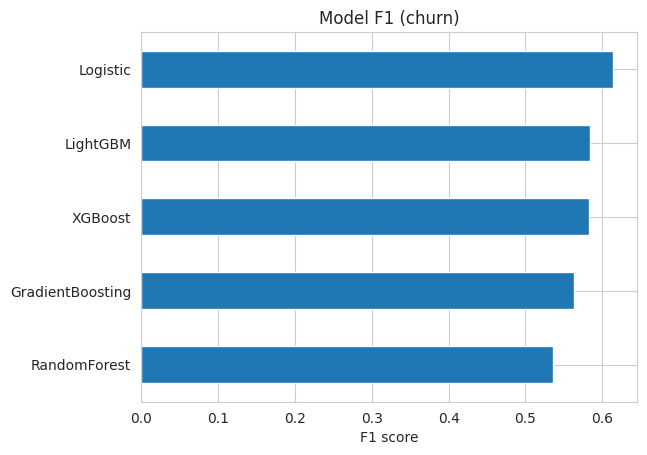

In [ ]:
res_df['f1'].sort_values().plot(kind='barh', title='Model F1 (churn)')
plt.xlabel('F1 score')
plt.show()
